In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## Convert categorical variables to numeric

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male: 1, Female: 0
data['Geography'] = label_encoder.fit_transform(data['Geography'])  # France: 0, Spain: 2, Germany: 1

## Scale numerical features

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
scaled_data = pd.DataFrame(scaled_features, columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

In [8]:
data_scaled = data[['CustomerId', 'Gender', 'Geography', 'HasCrCard', 'IsActiveMember', 'Exited']].join(scaled_data)

In [9]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis (EDA)
## Visualize the distribution of numerical features

<Figure size 1200x800 with 0 Axes>

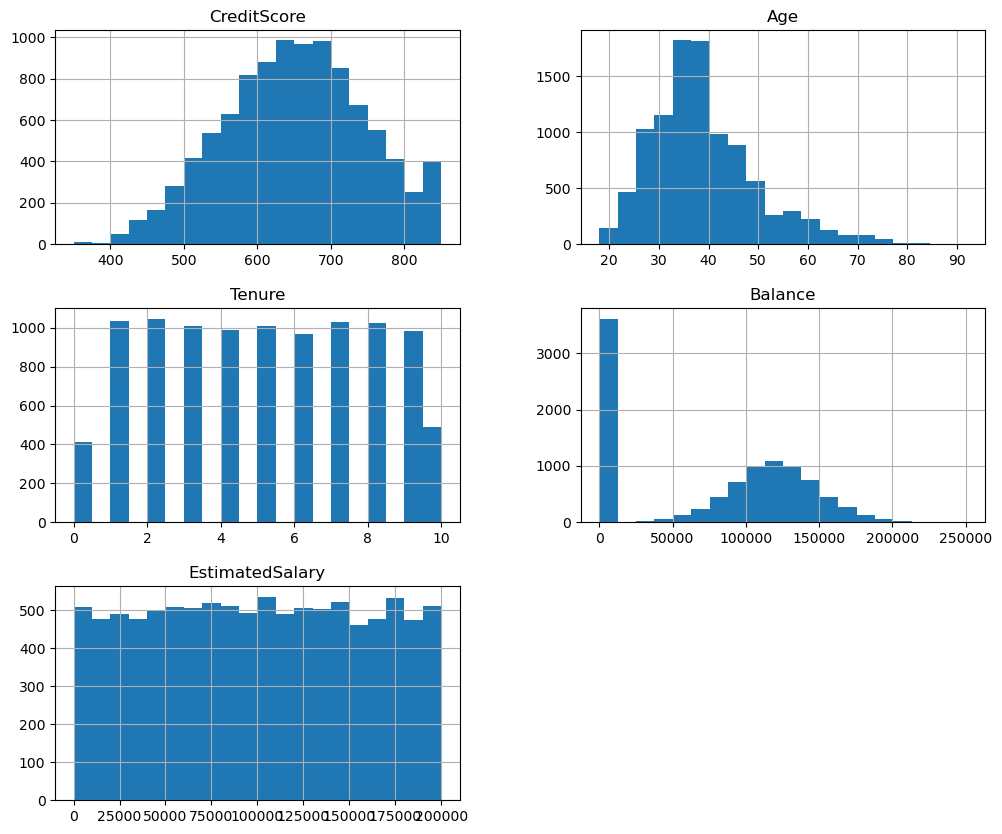

In [10]:
plt.figure(figsize=(12, 8))
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].hist(bins=20, figsize=(12, 10))
plt.show()

## Visualize relationships with target variable

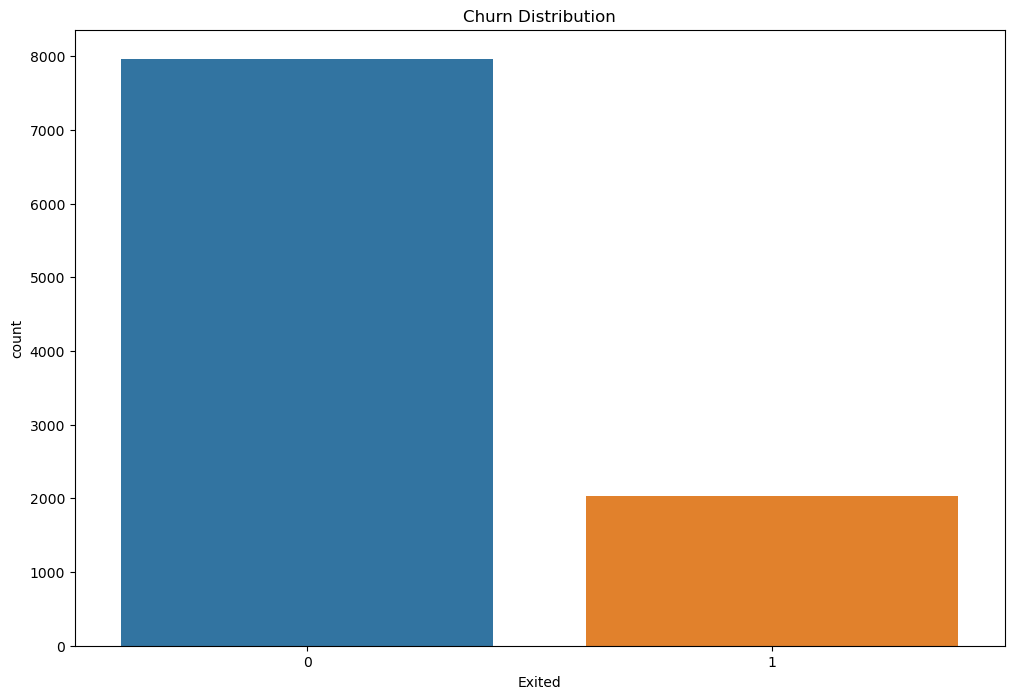

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.show()

## Visualize categorical feature distribution

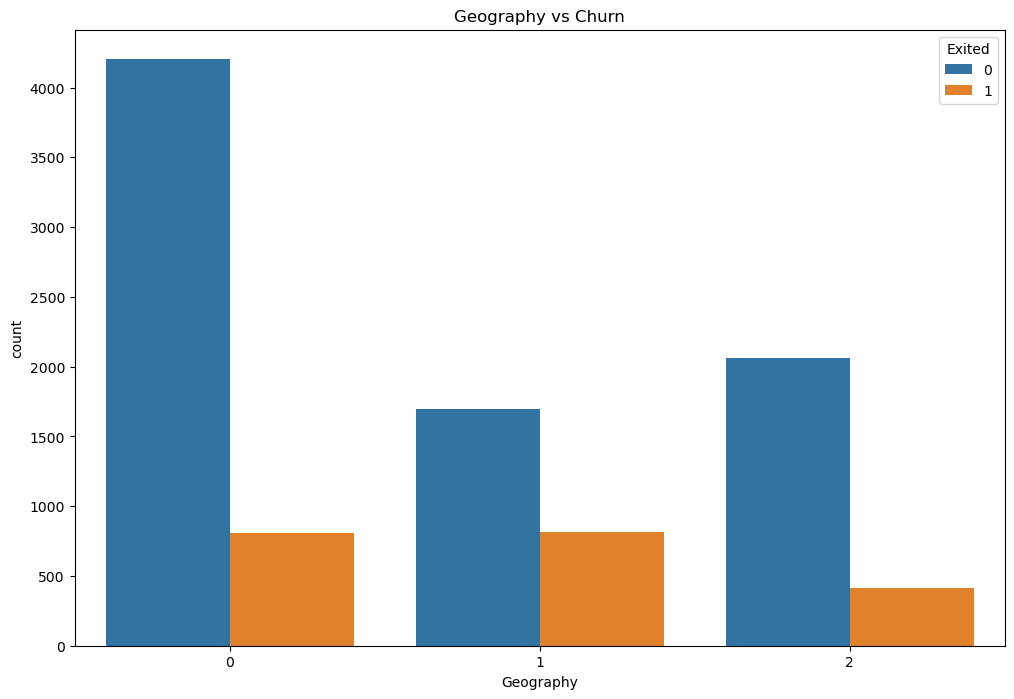

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Geography vs Churn')
plt.show()

## Analyze correlations between features

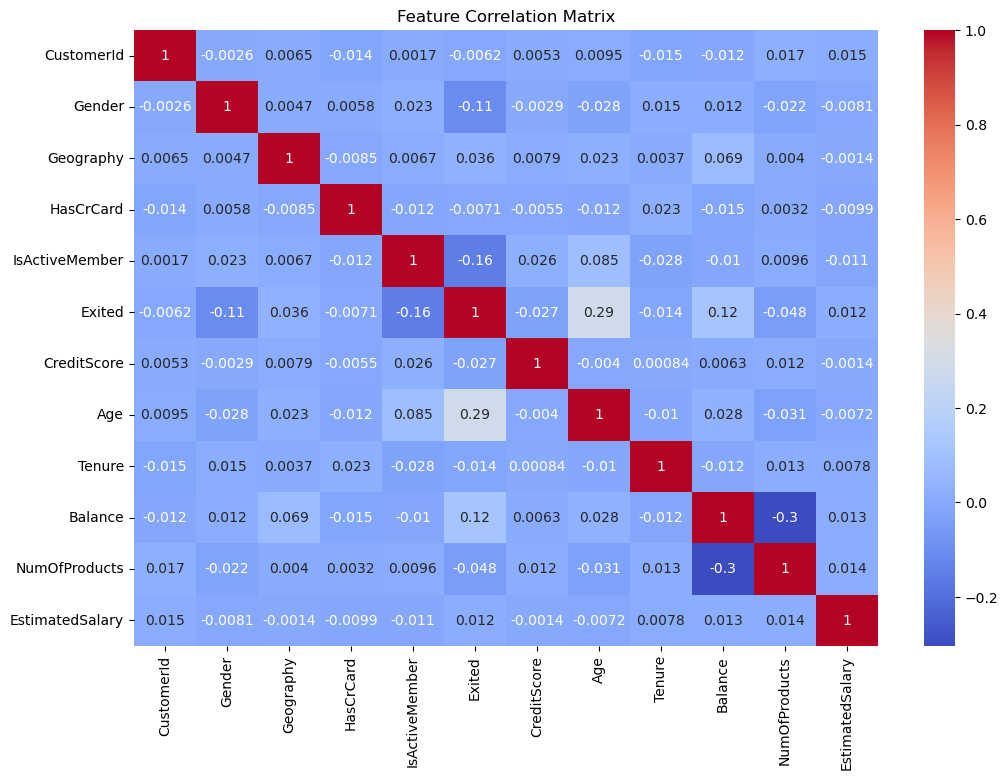

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Box Plot to identify potential outliers

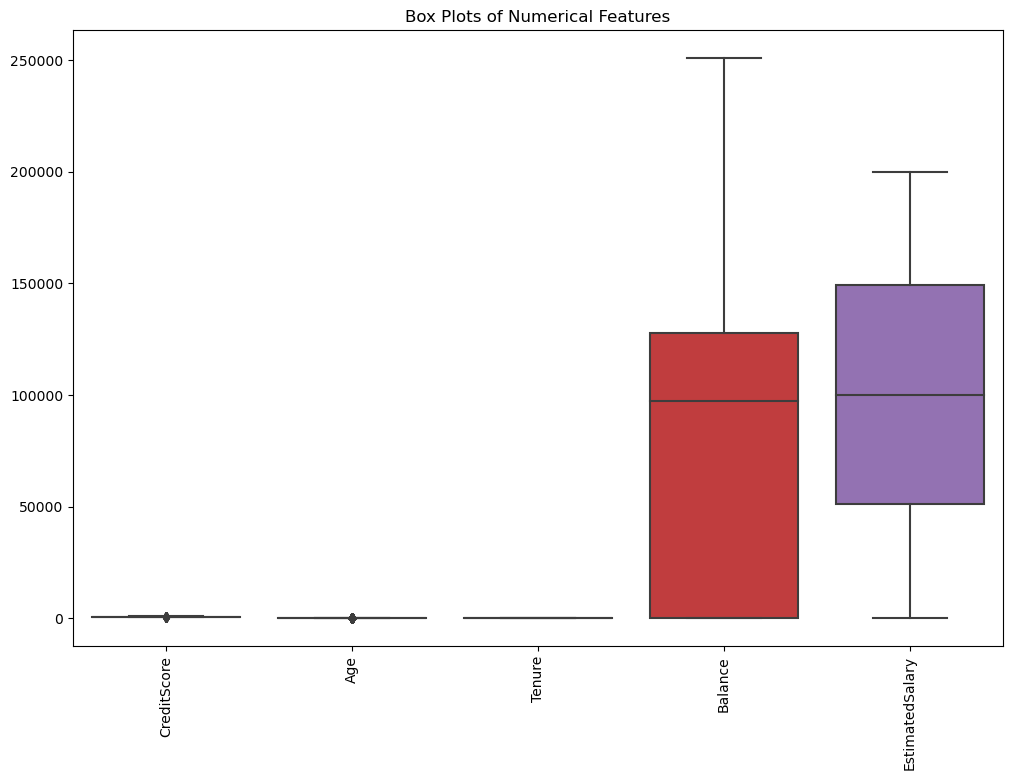

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

## Distribution of Features by Target Variable (Exited)

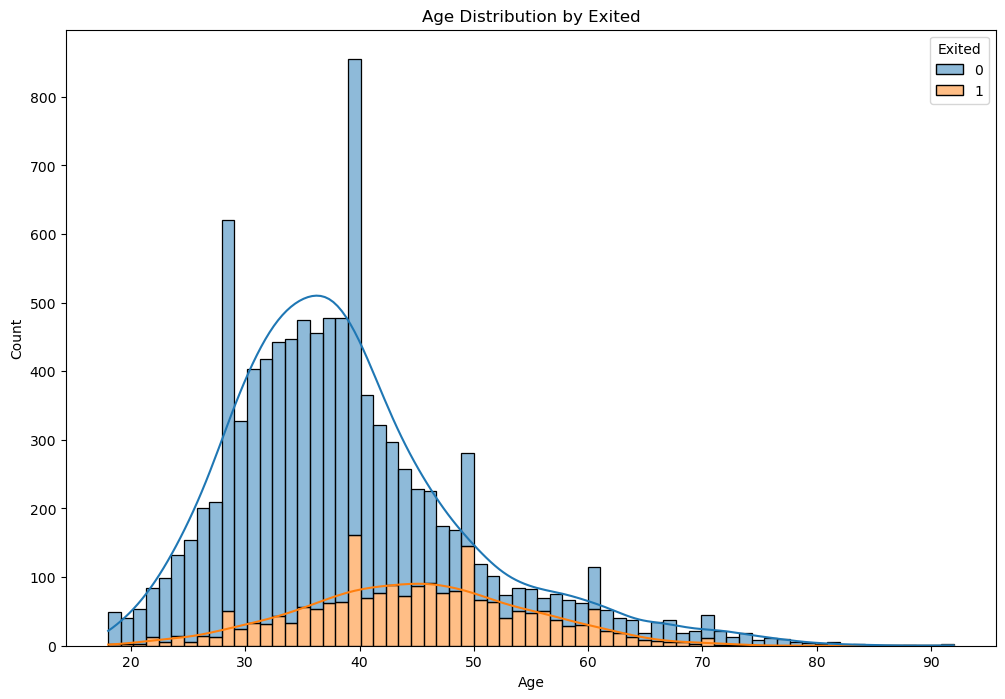

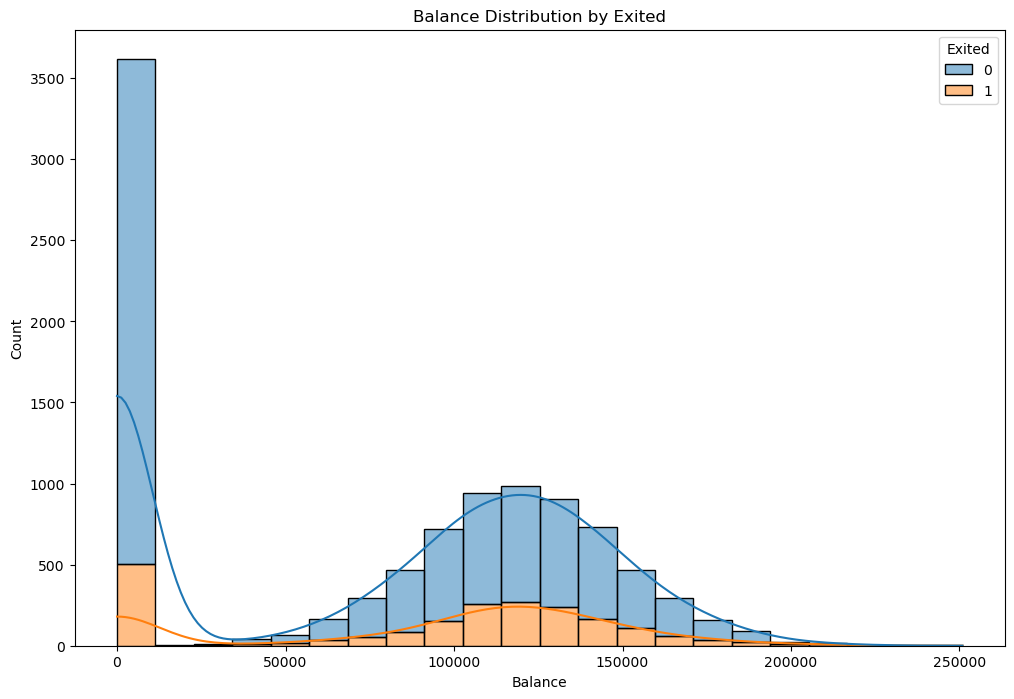

In [18]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Age', hue='Exited', multiple='stack', kde=True)
plt.title('Age Distribution by Exited')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Balance', hue='Exited', multiple='stack', kde=True)
plt.title('Balance Distribution by Exited')
plt.show()

## Distribution of Numerical Features by Geography

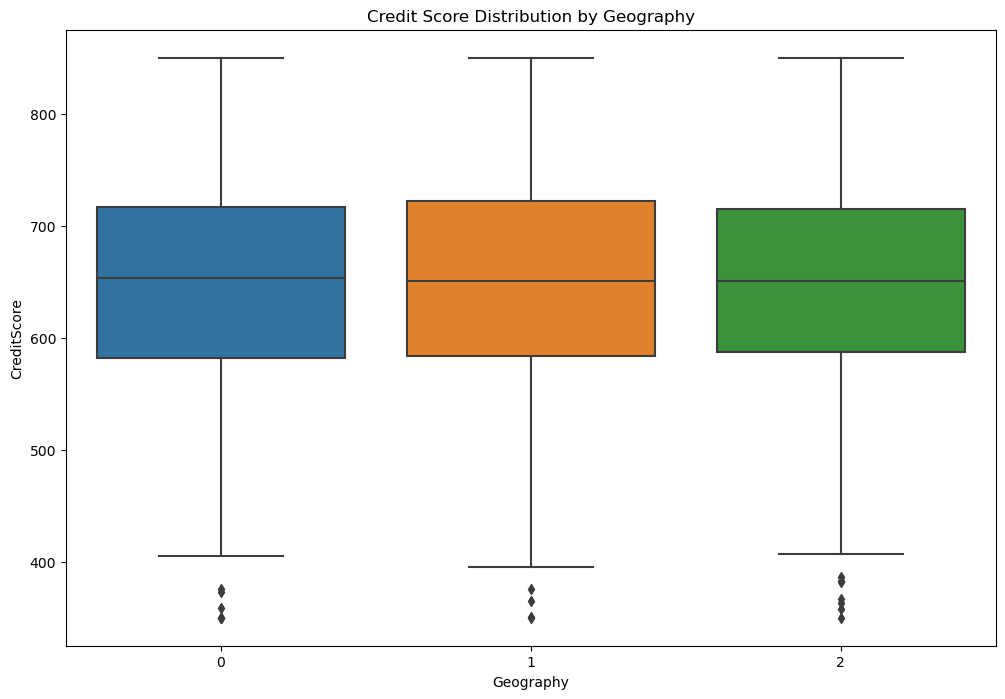

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Geography', y='CreditScore', data=data)
plt.title('Credit Score Distribution by Geography')
plt.show()

# Summary and Insights
### Age and Tenure: Older employees with longer tenure tended to have a lower churn rate. This could imply that experienced and older employees are more stable and less likely to leave.
### Geography Influence: Employees from Spain showed a slightly higher churn rate compared to those from France and Germany. This could be due to regional economic factors or differences in employee satisfaction.
### Product Usage: Employees with a higher number of products (financial services) with the bank had lower churn rates, suggesting that deeper engagement with services reduces the likelihood of leaving.
### Active Membership and Credit Card Ownership: Active members and those with credit cards had lower churn rates, possibly due to increased interaction and satisfaction with the services offered.

# Model Training and Evaluation

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

## Split the data into training and testing sets

In [23]:
X = data_scaled.drop(columns=['CustomerId', 'Exited'])
y = data_scaled['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and evaluate a Logistic Regression model

In [24]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [25]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Logistic Regression ROC AUC Score: 0.5766683925763716


## Train and evaluate a Random Forest Classifier

In [26]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [27]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.87      0.87      0.86      2000

Random Forest ROC AUC Score: 0.7217065605153028


## Train and evaluate a Gradient Boosting Classifier

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

In [29]:
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Gradient Boosting ROC AUC Score: 0.7154283660385305


## Compare model performance

In [30]:
print("Comparison of Model Performance:")
print("Logistic Regression Accuracy:", log_reg.score(X_test, y_test))
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))
print("Gradient Boosting Accuracy:", gb_clf.score(X_test, y_test))

Comparison of Model Performance:
Logistic Regression Accuracy: 0.8155
Random Forest Accuracy: 0.8725
Gradient Boosting Accuracy: 0.8655
